<a href="https://colab.research.google.com/github/be1le/machine-learning/blob/main/binarypokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] =  # username
os.environ['KAGGLE_KEY'] =  # key

In [ ]:
!kaggle datasets download -d abcsds/pokemon

pokemon.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip pokemon.zip

Archive:  pokemon.zip
replace Pokemon.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Pokemon.csv             


In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [ ]:
df = pd.read_csv('Pokemon.csv')

df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
df = pd.read_csv('Pokemon.csv', usecols=[ #usecols 로 사용하는 칼럼만 뽑아낸다.
  'Total', # 
  'HP', # 
  'Attack', # 
  'Defense', # 
  'Speed',
  'Legendary' # 
])

df.head(5)

,Total,HP,Attack,Defense,Speed,Legendary
0,318,45,49,49,45,False
1,405,60,62,63,60,False
2,525,80,82,83,80,False
3,625,80,100,123,80,False
4,309,39,52,43,65,False


레전더리 포켓몬의 수 

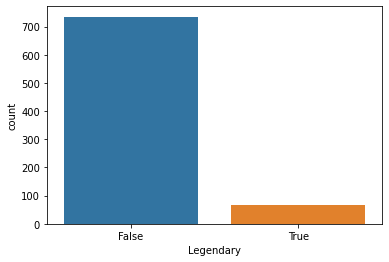

In [ ]:
sns.countplot(x=df['Legendary'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Total      800 non-null    int64
 1   HP         800 non-null    int64
 2   Attack     800 non-null    int64
 3   Defense    800 non-null    int64
 4   Speed      800 non-null    int64
 5   Legendary  800 non-null    bool 
dtypes: bool(1), int64(5)
memory usage: 32.2 KB


In [ ]:
print(df.isnull().sum())

Total        0
HP           0
Attack       0
Defense      0
Speed        0
Legendary    0
dtype: int64


In [ ]:
print(len(df))

df = df.dropna() #이함수로 지워주는 것이다. 

print(len(df))

800
414


**x,y데이터 분할**

In [ ]:
x_data = df.drop(columns=['Legendary'], axis=1)
x_data = x_data.astype(np.float32)#astype() method is used to cast a pandas object to a specified dtype

x_data.head(5)

,Total,HP,Attack,Defense,Speed
0,318.0,45.0,49.0,49.0,45.0
1,405.0,60.0,62.0,63.0,60.0
2,525.0,80.0,82.0,83.0,80.0
3,625.0,80.0,100.0,123.0,80.0
4,309.0,39.0,52.0,43.0,65.0


In [ ]:
y_data = df[['Legendary']]
y_data = y_data.astype(np.float32)

y_data.head()

,Legendary
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
scaler = StandardScaler() #정의를한다음에 
x_data_scaled = scaler.fit_transform(x_data) # 핏트렌스폼이라는 메소드를 호출하면된다. 

print(x_data.values[0])
print(x_data_scaled[0])

[318.  45.  49.  49.  45.]
[-0.9767655  -0.95062625 -0.92490613 -0.79715365 -0.8015032 ]


# 학습,검증   데이터 분할과정!

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)
#train_test_split으로 나눠서 실행

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(640, 5) (160, 5)
(640, 1) (160, 1)


모델 fitting!

In [ ]:
model = Sequential([
  Dense(1, activation='sigmoid') # activation이라는 argument에 sigmoid를 넣어 주면 함수가 실행된다.
])

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.025), metrics=['acc'])
#이진논리회귀를 쓸때는 binary crossentropy를 쓴다 
#metrics는 loss만으로는 학습결과를 잘알지못하기에 classification문제에서는 metrics가 정확도를 같이 보여준다.0~1

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=20 # epochs 복수형으로 쓰기!
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
20/20 [==============================] - 0s 9ms/step - loss: 38.6862 - acc: 0.9187 - val_loss: 17.2009 - val_acc: 0.9187
Epoch 2/20
20/20 [==============================] - 0s 2ms/step - loss: 10.1572 - acc: 0.7891 - val_loss: 8.1639 - val_acc: 0.9062
Epoch 3/20
20/20 [==============================] - 0s 2ms/step - loss: 6.3979 - acc: 0.8109 - val_loss: 5.4328 - val_acc: 0.8125
Epoch 4/20
20/20 [==============================] - 0s 2ms/step - loss: 4.7617 - acc: 0.8109 - val_loss: 4.2249 - val_acc: 0.8062
Epoch 5/20
20/20 [==============================] - 0s 3ms/step - loss: 3.3272 - acc: 0.8203 - val_loss: 4.6384 - val_acc: 0.5000
Epoch 6/20
20/20 [==============================] - 0s 3ms/step - loss: 3.3471 - acc: 0.7875 - val_loss: 3.1197 - val_acc: 0.9000
Epoch 7/20
20/20 [==============================] - 0s 3ms/step - loss: 2.5639 - acc: 0.8188 - val_loss: 3.3251 - val_acc: 0.5250
Epoch 8/20
20/20 [==============================] - 0s 3ms/step - loss: 2.1701 - acc: 0